In [23]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta

import statsmodels.formula.api as sm

from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.discrete.discrete_model import Probit, Poisson, NegativeBinomial
from statsmodels.discrete.count_model import ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP

from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
df_q = pd.read_csv('q_approximation_avg_reward.csv')
df_semi = pd.read_csv('semi_sarsa_avg_reward.csv')
df_online = pd.read_csv('online_sarsa_avg_reward.csv')

In [25]:
df_q

,tranAvg,lastAvg,time
0,-487.000000,-4.87,0.000057
1,21.000000,5.29,0.012864
2,190.333333,5.29,0.011118
3,275.000000,5.29,0.009944
4,122.800000,-4.86,0.004768
5,190.166667,5.27,0.012048
6,92.857143,-4.91,0.009146
7,147.375000,5.29,0.010025
8,189.000000,5.22,0.016719
9,222.400000,5.23,0.017691


In [26]:
df_semi

,tranAvg,lastAvg,time
0,-488.000000,-4.88,0.000040
1,18.500000,5.25,0.029082
2,188.000000,5.27,0.020353
3,272.750000,5.27,0.018484
4,324.000000,5.29,0.015808
5,357.833333,5.27,0.018573
6,382.285714,5.29,0.015404
7,400.125000,5.25,0.019646
8,414.444444,5.29,0.015803
9,425.700000,5.27,0.016757


In [27]:
df_online

,tranAvg,lastAvg,time
0,-486.000000,-4.86,0.000046
1,19.500000,5.25,0.025567
2,186.000000,5.19,0.027695
3,271.250000,5.27,0.018449
4,322.800000,5.29,0.015798
5,188.166667,-4.85,0.023756
6,236.857143,5.29,0.015646
7,272.625000,5.23,0.028711
8,300.888889,5.27,0.019750
9,323.500000,5.27,0.019961


In [29]:
df_q = df_q.rename(columns = {'tranAvg':'Q'})
df_semi = df_semi.rename(columns = {'tranAvg':'semi'})
df_online = df_online.rename(columns = {'tranAvg':'online'})

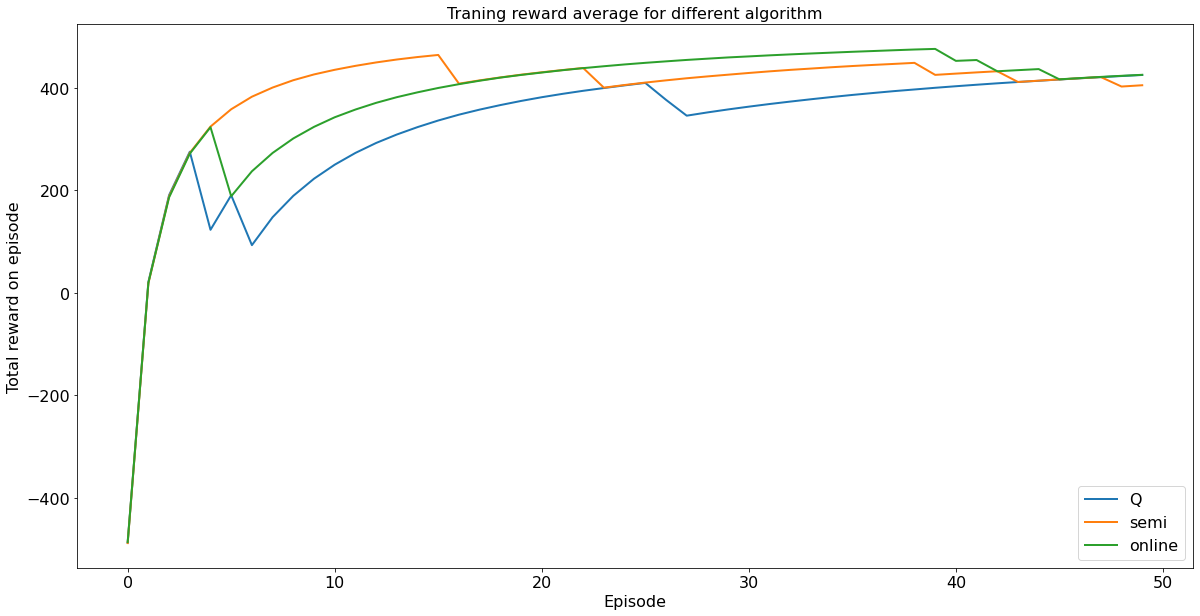

In [31]:
linewidth = 2
fontsize = 16

fig, ax = plt.subplots(figsize = (20, 10))
df_q['Q'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
#df_count['number_users'].plot(ax=ax, secondary_y=True, fontsize=fontsize, lw=linewidth, style=[':',':'])
df_semi['semi'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
df_online['online'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])

ax.set_xlabel('Episode', fontsize = fontsize)
ax.set_ylabel('Total reward on episode', fontsize=fontsize)
#ax.right_ax.set_ylabel('Number of users', fontsize=fontsize)
plt.title('Traning reward average for different algorithm', fontsize=fontsize)
#ax.set_xticklabels(df_count['sunday'].tolist(), rotation = 45)
#lines = ax.get_lines() + ax.right_ax.get_lines()
lines = ax.get_lines()
#ax.axvline(52, linewidth = 2, color ='r')
ax.legend(lines, [l.get_label() for l in lines], loc = 'lower right', fontsize = fontsize)

# mediumClassic

In [50]:
df_q = pd.read_csv('mediumClassic/q_approximation_avg_reward.csv')
df_semi = pd.read_csv('mediumClassic/semi_sarsa_avg_reward.csv')
df_online = pd.read_csv('mediumClassic/online_sarsa_avg_reward.csv')

In [51]:
df_semi

,Avg,lastAvg,time
0,527.000000,5.27,0.000038
1,527.000000,5.27,0.021554
2,526.333333,5.25,0.025547
3,527.000000,5.29,0.019469
4,527.000000,5.27,0.026303
...,...,...,...
105,526.333333,5.27,3.384482
106,526.428571,5.27,3.516085
107,526.500000,5.27,3.463515
108,526.555556,5.27,3.526274


In [52]:
df_q = df_q.rename(columns = {'Avg':'Q'})
df_semi = df_semi.rename(columns = {'Avg':'semi'})
df_online = df_online.rename(columns = {'Avg':'online'})

In [65]:
df_q_train = df_q.head(100)
df_semi_train = df_semi.head(100)
df_online_train = df_online.head(100)

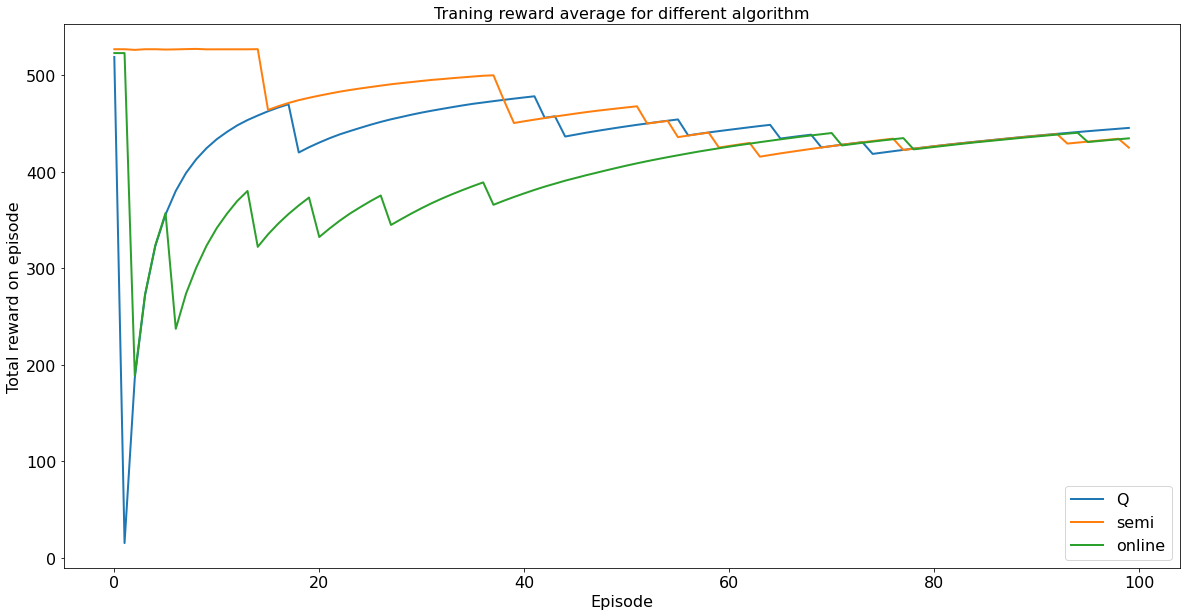

In [55]:
linewidth = 2
fontsize = 16

fig, ax = plt.subplots(figsize = (20, 10))
df_q_train['Q'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
#df_count['number_users'].plot(ax=ax, secondary_y=True, fontsize=fontsize, lw=linewidth, style=[':',':'])
df_semi_train['semi'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
df_online_train['online'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])

ax.set_xlabel('Episode', fontsize = fontsize)
ax.set_ylabel('Total reward on episode', fontsize=fontsize)
#ax.right_ax.set_ylabel('Number of users', fontsize=fontsize)
plt.title('Traning reward average for different algorithm', fontsize=fontsize)
#ax.set_xticklabels(df_count['sunday'].tolist(), rotation = 45)
#lines = ax.get_lines() + ax.right_ax.get_lines()
lines = ax.get_lines()
#ax.axvline(52, linewidth = 2, color ='r')
ax.legend(lines, [l.get_label() for l in lines], loc = 'lower right', fontsize = fontsize)

In [56]:
df_q_test = df_q.tail(10)
df_semi_test = df_semi.tail(10)
df_online_test = df_online.tail(10)

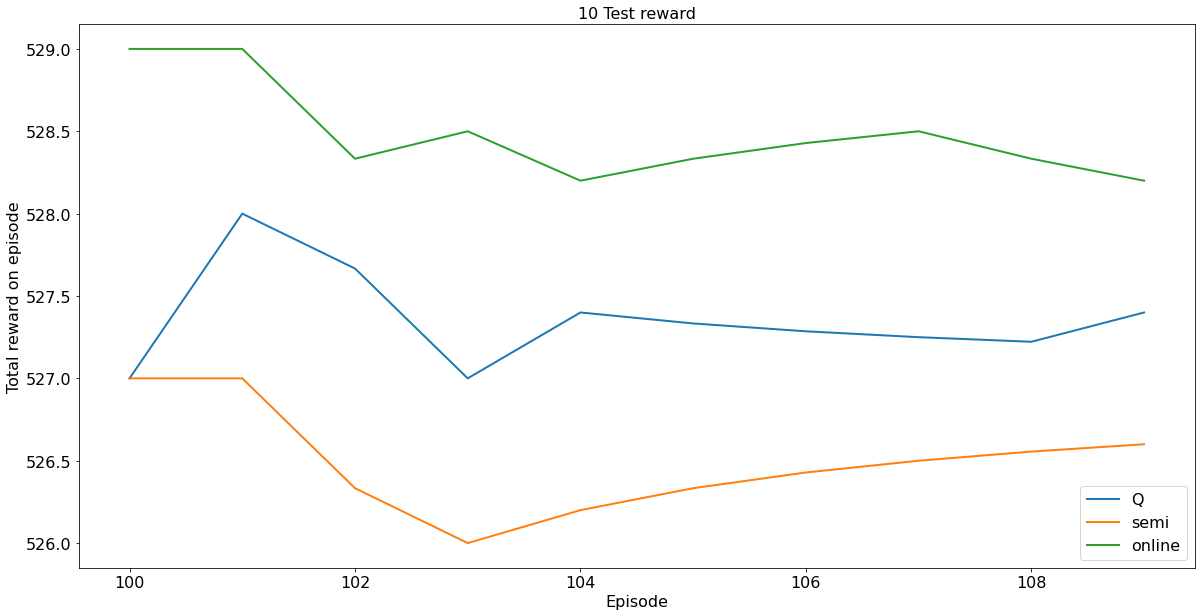

In [59]:
linewidth = 2
fontsize = 16

fig, ax = plt.subplots(figsize = (20, 10))
df_q_test['Q'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
#df_count['number_users'].plot(ax=ax, secondary_y=True, fontsize=fontsize, lw=linewidth, style=[':',':'])
df_semi_test['semi'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
df_online_test['online'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])

ax.set_xlabel('Episode', fontsize = fontsize)
ax.set_ylabel('Total reward on episode', fontsize=fontsize)
#ax.right_ax.set_ylabel('Number of users', fontsize=fontsize)
plt.title('10 Test reward', fontsize=fontsize)
#ax.set_xticklabels(df_count['sunday'].tolist(), rotation = 45)
#lines = ax.get_lines() + ax.right_ax.get_lines()
lines = ax.get_lines()
#ax.axvline(52, linewidth = 2, color ='r')
ax.legend(lines, [l.get_label() for l in lines], loc = 'lower right', fontsize = fontsize)

In [66]:
df_q_train = df_q_train.rename(columns = {'time':'Q_time'})
df_semi_train = df_semi_train.rename(columns = {'time':'semi_time'})
df_online_train = df_online_train.rename(columns = {'time':'online_time'})

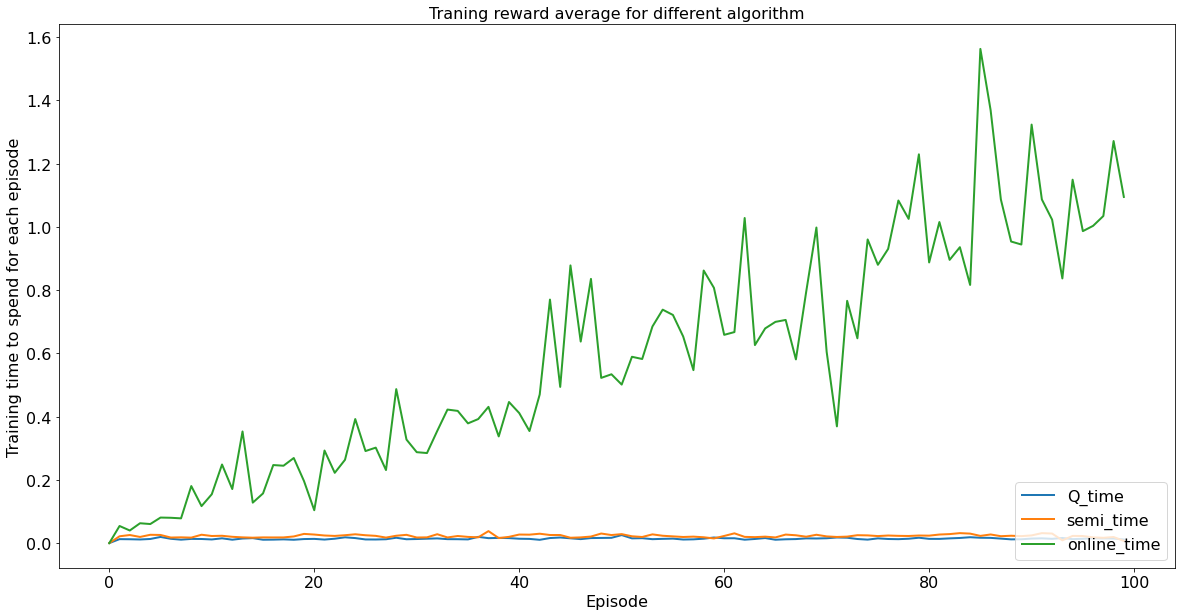

In [67]:
linewidth = 2
fontsize = 16

fig, ax = plt.subplots(figsize = (20, 10))
df_q_train['Q_time'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
#df_count['number_users'].plot(ax=ax, secondary_y=True, fontsize=fontsize, lw=linewidth, style=[':',':'])
df_semi_train['semi_time'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
df_online_train['online_time'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])

ax.set_xlabel('Episode', fontsize = fontsize)
ax.set_ylabel('Training time to spend for each episode', fontsize=fontsize)
#ax.right_ax.set_ylabel('Number of users', fontsize=fontsize)
plt.title('Traning reward average for different algorithm', fontsize=fontsize)
#ax.set_xticklabels(df_count['sunday'].tolist(), rotation = 45)
#lines = ax.get_lines() + ax.right_ax.get_lines()
lines = ax.get_lines()
#ax.axvline(52, linewidth = 2, color ='r')
ax.legend(lines, [l.get_label() for l in lines], loc = 'lower right', fontsize = fontsize)

In [68]:
df_q_test = df_q_test.rename(columns = {'time':'Q_time'})
df_semi_test = df_semi_test.rename(columns = {'time':'semi_time'})
df_online_test = df_online_test.rename(columns = {'time':'online_time'})

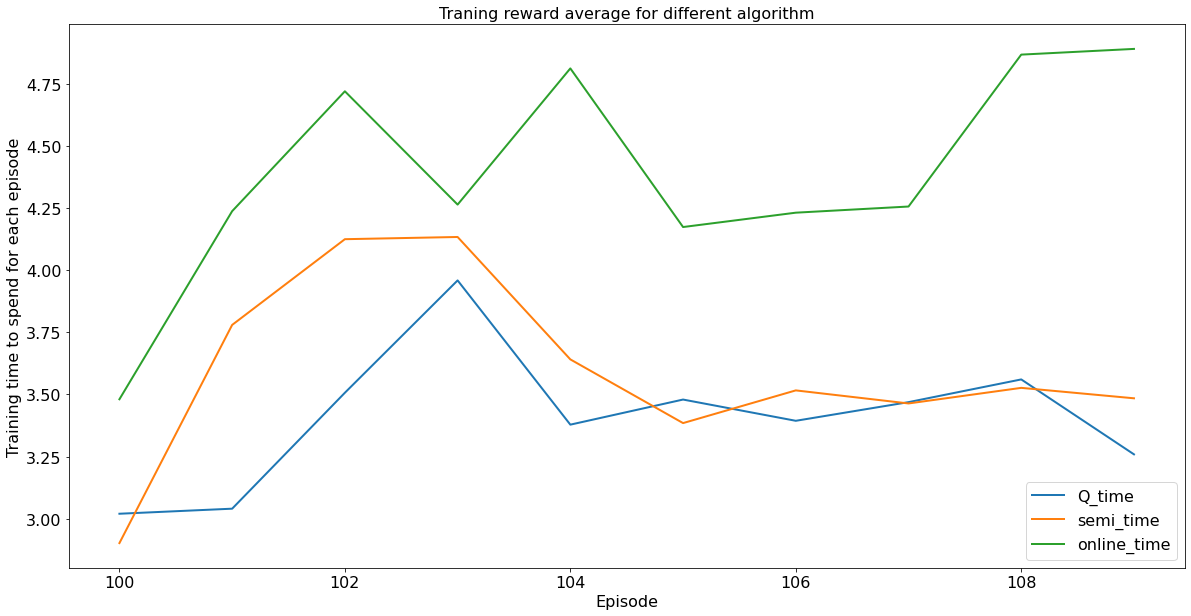

In [70]:
linewidth = 2
fontsize = 16

fig, ax = plt.subplots(figsize = (20, 10))
df_q_test['Q_time'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
#df_count['number_users'].plot(ax=ax, secondary_y=True, fontsize=fontsize, lw=linewidth, style=[':',':'])
df_semi_test['semi_time'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])
df_online_test['online_time'].plot(ax=ax, fontsize = fontsize, lw=linewidth, style=['-',':'])

ax.set_xlabel('Episode', fontsize = fontsize)
ax.set_ylabel('Training time to spend for each episode', fontsize=fontsize)
#ax.right_ax.set_ylabel('Number of users', fontsize=fontsize)
plt.title('Traning reward average for different algorithm', fontsize=fontsize)
#ax.set_xticklabels(df_count['sunday'].tolist(), rotation = 45)
#lines = ax.get_lines() + ax.right_ax.get_lines()
lines = ax.get_lines()
#ax.axvline(52, linewidth = 2, color ='r')
ax.legend(lines, [l.get_label() for l in lines], loc = 'lower right', fontsize = fontsize)